In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from pactools.grid_search import GridSearchCVProgressBar
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline
import seaborn as sns
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from math import radians, sin, cos, acos
from datetime import datetime

# classification models
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

C:\Users\Alfred\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [2]:
pd.options.display.max_columns = 999

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
train_df.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [5]:
train_df.shape

(10506, 12)

In [6]:
train_df['Date'] = train_df['Date'].map(lambda x:datetime.strptime(x, '%Y-%m-%d'))
test_df['Date'] = test_df['Date'].map(lambda x:datetime.strptime(x, '%Y-%m-%d'))

In [7]:
weather_df = pd.read_csv('weather_clean.csv')
weather_df['Date'] = weather_df['Date'].map(lambda x:datetime.strptime(x, '%Y-%m-%d'))

In [8]:
weather_df.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,weekday_name,day,month,year,temp_spread,Tavg2,r_humidity,Sunrise_dt,Sunset_dt,len_day,len_day1
0,1,2007-05-01,83,50,67.0,14,10.56,56,0,2,448,1849,,0,M,0.0,0.0,29.10,29.82,1.7,27,9.2,Tuesday,1,May,2007,33,19.44,0.56,1900-01-01 04:48:00,1900-01-01 18:49:00,840.6,841.0
1,2,2007-05-01,84,52,68.0,14,10.56,57,0,3,448,1849,,M,M,M,0.0,29.18,29.82,2.7,25,9.6,Tuesday,1,May,2007,32,20.00,0.55,1900-01-01 04:48:00,1900-01-01 18:49:00,840.6,841.0
2,1,2007-05-02,59,42,51.0,-3,5.56,47,14,0,447,1850,BR,0,M,0.0,0.0,29.38,30.09,13.0,4,13.4,Wednesday,2,May,2007,17,10.56,0.71,1900-01-01 04:47:00,1900-01-01 18:50:00,841.8,843.0
3,2,2007-05-02,60,43,52.0,-3,5.56,47,13,0,447,1850,BR HZ,M,M,M,0.0,29.44,30.08,13.3,2,13.4,Wednesday,2,May,2007,17,11.11,0.69,1900-01-01 04:47:00,1900-01-01 18:50:00,841.8,843.0
4,1,2007-05-03,66,46,56.0,2,4.44,48,9,0,446,1851,,0,M,0.0,0.0,29.39,30.12,11.7,7,11.9,Thursday,3,May,2007,20,13.33,0.55,1900-01-01 04:46:00,1900-01-01 18:51:00,843.0,845.0


In [9]:
train_df['WnvPresent'].value_counts(normalize=True)

0    0.947554
1    0.052446
Name: WnvPresent, dtype: float64

In [10]:
# imbalanced training data

In [11]:
# join weather info using weather and a distance criteria using latitude and longitude info
# create distance function

In [12]:
def geo_distance(loc1,loc2):
    lat1, long1 = loc1
    lat2, long2 = loc2
    lat1rad = radians(lat1)
    lat2rad = radians(lat2)
    long1rad = radians(long1)
    long2rad = radians(long2)
    dist = 6371.01 * acos(sin(lat1rad)*sin(lat2rad) + cos(lat1rad)*cos(lat2rad)*cos(long1rad - long2rad))
    return dist

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
Date                      10506 non-null datetime64[ns]
Address                   10506 non-null object
Species                   10506 non-null object
Block                     10506 non-null int64
Street                    10506 non-null object
Trap                      10506 non-null object
AddressNumberAndStreet    10506 non-null object
Latitude                  10506 non-null float64
Longitude                 10506 non-null float64
AddressAccuracy           10506 non-null int64
NumMosquitos              10506 non-null int64
WnvPresent                10506 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 985.0+ KB


In [14]:
train_df['coord'] = list(zip(train_df['Latitude'],train_df['Longitude']))
test_df['coord'] =  list(zip(test_df['Latitude'],test_df['Longitude']))

In [15]:
# Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level
# Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level

train_df['dist_ohare'] = train_df['coord'].map(lambda x: geo_distance(x,(41.995,-87.933)))
train_df['dist_ohare'].head()

0    11.797410
1    11.797410
2    13.529994
3     9.239547
4     9.239547
Name: dist_ohare, dtype: float64

In [16]:
test_df['dist_ohare'] = test_df['coord'].map(lambda x: geo_distance(x,(41.995,-87.933)))

In [17]:
train_df['dist_mid'] = train_df['coord'].map(lambda x: geo_distance(x,(41.786,-87.752)))
train_df['dist_mid'].head()

0    19.191132
1    19.191132
2    23.282749
3    21.765962
4    21.765962
Name: dist_mid, dtype: float64

In [18]:
test_df['dist_mid'] = test_df['coord'].map(lambda x: geo_distance(x,(41.786,-87.752)))

(array([ 604.,  445.,  581.,  882., 1244., 1824., 1482., 1094.,  926.,
        1424.]),
 array([ 0.85721353,  3.39921156,  5.9412096 ,  8.48320763, 11.02520567,
        13.5672037 , 16.10920174, 18.65119977, 21.1931978 , 23.73519584,
        26.27719387]),
 <a list of 10 Patch objects>)

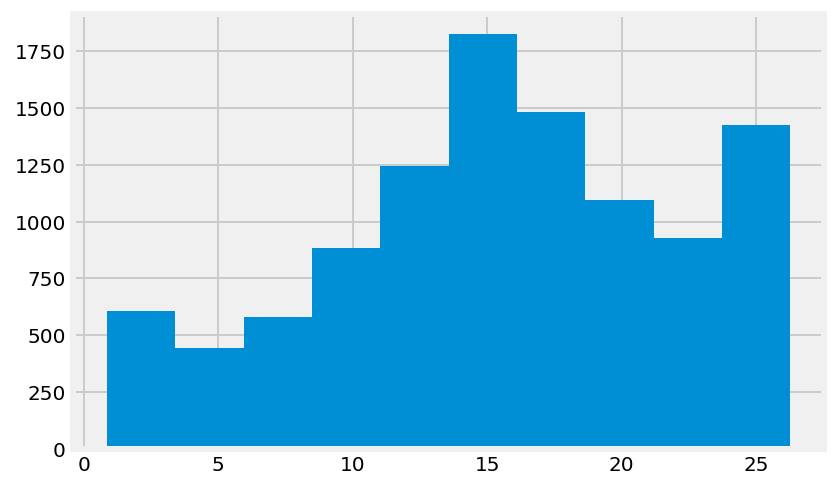

In [19]:
plt.hist(train_df['dist_mid'])

(array([ 970.,  885., 1112.,  971., 1383., 1269.,  503., 1409.,  901.,
        1103.]),
 array([ 4.13988809,  8.68813287, 13.23637766, 17.78462244, 22.33286723,
        26.88111201, 31.42935679, 35.97760158, 40.52584636, 45.07409114,
        49.62233593]),
 <a list of 10 Patch objects>)

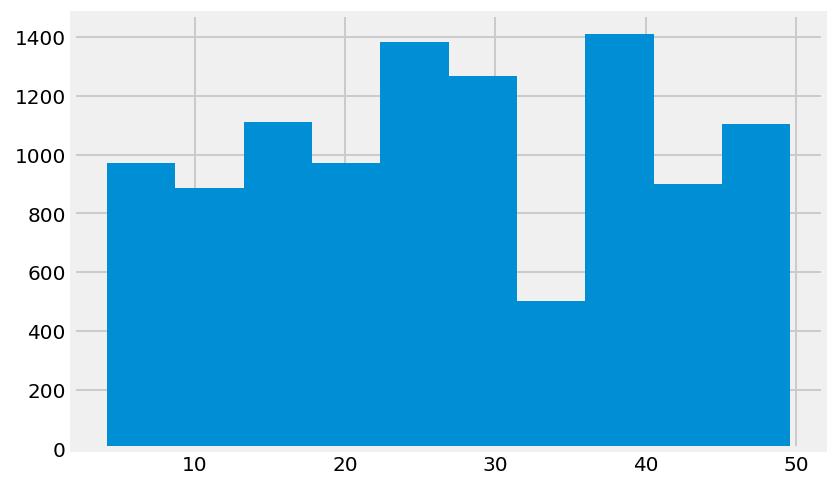

In [20]:
plt.hist(train_df['dist_ohare'])

In [21]:
train_df[['dist_ohare','dist_mid']].head(10)

,dist_ohare,dist_mid
0,11.797410,19.191132
1,11.797410,19.191132
2,13.529994,23.282749
3,9.239547,21.765962
4,9.239547,21.765962
5,23.502769,16.659742
6,25.768892,14.208348
7,27.093539,12.123328
8,27.093539,12.123328
9,25.460508,14.650500


In [22]:
#def proxy(df):
#    if df['dist_ohare'] < df['dist_mid']:
#        return 1
#    else:
#        return 2
#    
#train_df['Station'] = train_df.apply(proxy, axis=1)

In [23]:
train_df[['dist_ohare','dist_mid']].head(10)

,dist_ohare,dist_mid
0,11.797410,19.191132
1,11.797410,19.191132
2,13.529994,23.282749
3,9.239547,21.765962
4,9.239547,21.765962
5,23.502769,16.659742
6,25.768892,14.208348
7,27.093539,12.123328
8,27.093539,12.123328
9,25.460508,14.650500


In [24]:
spray_df = pd.read_csv('spray.csv')
spray_df['Date'] = spray_df['Date'].map(lambda x:datetime.strptime(x,'%Y-%m-%d'))
spray_df.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [25]:
spray_df.tail()

,Date,Time,Latitude,Longitude
14830,2013-09-05,8:34:11 PM,42.006587,-87.812355
14831,2013-09-05,8:35:01 PM,42.006192,-87.816015
14832,2013-09-05,8:35:21 PM,42.006022,-87.817392
14833,2013-09-05,8:35:31 PM,42.005453,-87.817423
14834,2013-09-05,8:35:41 PM,42.004805,-87.817460


In [26]:
spray_df['Date'].value_counts()

2013-08-15    2668
2013-08-29    2302
2013-07-17    2202
2011-09-07    2114
2013-07-25    1607
2013-08-22    1587
2013-08-08    1195
2013-09-05     924
2013-08-16     141
2011-08-29      95
Name: Date, dtype: int64

In [140]:
exp_df = train_df[['Date','Address','Species','NumMosquitos','WnvPresent']].groupby(['Date','Address','Species']).sum().add_suffix('_sum').reset_index()

In [145]:
exp_df[exp_df['NumMosquitos_sum']>10].head()

,Date,Address,Species,NumMosquitos_sum,WnvPresent_sum
121,2007-06-26,"4200 West 127th Street, Alsip, IL 60803, USA",CULEX PIPIENS/RESTUANS,20,0
122,2007-06-26,"4200 West 127th Street, Alsip, IL 60803, USA",CULEX RESTUANS,25,0
153,2007-06-26,"University of Illinois at Chicago, 1100 South ...",CULEX RESTUANS,19,0
224,2007-07-02,"2500 West Grand Avenue, Chicago, IL 60654, USA",CULEX RESTUANS,16,0
229,2007-07-02,"3500 West 116th Street, Chicago, IL 60655, USA",CULEX PIPIENS/RESTUANS,28,0


In [29]:
trap_lst = []
for trap in train_df['Trap'].unique():
    if train_df[train_df['Trap'] == trap]['Address'].nunique() != 1:
        trap_lst.append(trap)

In [30]:
trap_lst

['T009', 'T035']

In [31]:
train_df[['Date','Address','Trap','NumMosquitos']][train_df['Trap'] == 'T009'].groupby(['Date','Address','Trap']).sum()

,,,NumMosquitos
Date,Address,Trap,
2007-06-05,"9100 West Higgins Avenue, Chicago, IL 60656, USA",T009,2
2007-07-02,"9100 West Higgins Avenue, Chicago, IL 60656, USA",T009,2
2007-07-11,"9100 West Higgins Avenue, Chicago, IL 60656, USA",T009,15
2007-07-27,"9100 West Higgins Avenue, Chicago, IL 60656, USA",T009,3
2007-08-01,"9100 West Higgins Avenue, Chicago, IL 60656, USA",T009,44
2007-08-07,"9100 West Higgins Avenue, Chicago, IL 60656, USA",T009,37
2007-08-15,"9100 West Higgins Avenue, Chicago, IL 60656, USA",T009,65
2007-08-21,"9100 West Higgins Avenue, Chicago, IL 60656, USA",T009,53
2007-08-24,"9100 West Higgins Avenue, Chicago, IL 60656, USA",T009,38


In [32]:
train_df[['Date','Address','Trap','NumMosquitos']][train_df['Trap'] == 'T035'].groupby(['Date','Address','Trap']).sum()

,,,NumMosquitos
Date,Address,Trap,
2007-07-11,"3000 South Hoyne Avenue, Chicago, IL 60608, USA",T035,1
2007-07-18,"3000 South Hoyne Avenue, Chicago, IL 60608, USA",T035,1
2007-07-19,"3000 South Hoyne Avenue, Chicago, IL 60608, USA",T035,3
2007-07-27,"3000 South Hoyne Avenue, Chicago, IL 60608, USA",T035,4
2007-08-01,"3000 South Hoyne Avenue, Chicago, IL 60608, USA",T035,11
2007-08-07,"3000 South Hoyne Avenue, Chicago, IL 60608, USA",T035,5
2007-08-15,"3000 South Hoyne Avenue, Chicago, IL 60608, USA",T035,14
2007-08-21,"3000 South Hoyne Avenue, Chicago, IL 60608, USA",T035,12
2007-08-24,"3000 South Hoyne Avenue, Chicago, IL 60608, USA",T035,10


In [33]:
# hence nothing odd as the different addresses for a unique trap ID are found over different years and not on the same day

In [34]:
spray_df.columns

Index(['Date', 'Time', 'Latitude', 'Longitude'], dtype='object')

In [35]:
spray_df.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [36]:
test_df = pd.read_csv('test.csv')

In [37]:
test_df.columns

Index(['Id', 'Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy'],
      dtype='object')

In [38]:
# pseudocode
#for date in spray_dates:
#    for row in train:
#        if row['date'] - date <= 3:
#            coords = (row['lat'],row['long'])
#            for llrow in spray_dates[['lat','long']][spray_dates['date'] == date]:
#                if geo_dist(coords,(llrow['lat'],llrow['long'])) <= cut-off:
#                    row['sprayed'] = 1

In [39]:
spray_df['Date'].unique()

array(['2011-08-29T00:00:00.000000000', '2011-09-07T00:00:00.000000000',
       '2013-07-17T00:00:00.000000000', '2013-07-25T00:00:00.000000000',
       '2013-08-08T00:00:00.000000000', '2013-08-15T00:00:00.000000000',
       '2013-08-16T00:00:00.000000000', '2013-08-22T00:00:00.000000000',
       '2013-08-29T00:00:00.000000000', '2013-09-05T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [40]:
spray_dates = pd.DataFrame(data=spray_df['Date'].unique(),columns=['Date'])
spray_dates

,Date
0,2011-08-29
1,2011-09-07
2,2013-07-17
3,2013-07-25
4,2013-08-08
5,2013-08-15
6,2013-08-16
7,2013-08-22
8,2013-08-29
9,2013-09-05


In [41]:
#def ind(date,coord,days,km,data):
#    spray_date = data.Date
#    spray_coord = (data.Latitude, data.Longitude)
#    obs_date = date
#    obs_coord = coord
#    days_elapsed = (spray_date - obs_date).days
#    dist = geo_distance(obs_coord,spray_coord)
#    if (days_elapsed <= days) and (days_elapsed >= 0) and (dist <= km):
#        return 1
#    else:
#        return 0

#def spray_ind(data,days=3,km=5):
#    coord = data.coord
#    date = data.Date
#    days = days
#    km = km
#    spray_df['sprayed'] = spray_df.apply(lambda x: ind(date,coord,days,km,x), axis=1)
#    if spray_df['sprayed'].sum() != 0:
#        return 1
#    else:
#        return 0

In [42]:
#train_df['sprayed'] = train_df.apply(lambda x: spray_ind(x),axis=1)

In [43]:
#def spray_ind(data,days=3,km=5):
#    coord = data.coord
#    date = data.Date
#    days = days
#    km = km
#    sprayed = 0
#    for i, row in spray_df.iterrows():
#        while sprayed == 0:
#            days_elapsed = (row.Date - date).days
#            dist = geo_distance(coord,(row.Latitude,row.Longitude))
#            if (days_elapsed <= days) and (days_elapsed >= 0) and (dist <= km):
#                sprayed = 1
#            else:
#                sprayed = 0
#    return sprayed
    
#train_df['sprayed'] = train_df.apply(lambda x: spray_ind(x),axis=1)

In [44]:
#spray_dates = list(spray['Date'].unique())
#spray_dates.sort()
#spray_dates
#for date in spray_dates:
#    for i, row in train_df.iterrows():
#        obs_date = datetime.strptime(row['Date'],'%Y-%m-%d')
#        spray_date = datetime.strptime(date,'%Y-%m-%d')
#        if ((obs_date - spray_date).days >= 0) and ((obs_date - spray_date).days <= 3):
#            row['sprayed'] = 1
#            for j, llrow in spray_df[spray_df['Date'] == date].iterrows():
#                if geo_distance(row['coord'],(llrow['Latitude'],llrow['Longitude'])) <= 5:
#                    row['sprayed'] = 1

In [45]:
def date_ind(date,df=spray_dates,days=3):
    df['elapsed'] = df['Date'].map(lambda x:(date - x).days)
    if df['elapsed'][(df['elapsed'] >= 0) & (df['elapsed'] <= days)].empty:
        return 0
    else:
        return 1

In [46]:
train_df['sprayed'] = train_df['Date'].map(lambda x:date_ind(x))

In [47]:
train_df[train_df['sprayed'] == 1].head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,coord,dist_ohare,dist_mid,sprayed
7574,2011-09-01,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,15,0,"(41.95469, -87.800991)",11.797410,19.191132,1
7575,2011-09-01,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,7,0,"(41.95469, -87.800991)",11.797410,19.191132,1
7576,2011-09-01,"2500 West Grand Avenue, Chicago, IL 60654, USA",CULEX PIPIENS,25,W GRAND AVE,T046,"2500 W GRAND AVE, Chicago, IL",41.891118,-87.654491,8,1,0,"(41.891118, -87.65449100000001)",25.768892,14.208348,1
7577,2011-09-01,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,1,0,"(41.867108, -87.654224)",27.093539,12.123328,1
7578,2011-09-01,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX PIPIENS/RESTUANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,3,0,"(41.896282, -87.655232)",25.460508,14.650500,1


In [48]:
train_df[train_df['sprayed'] == 1].shape

(1188, 16)

In [49]:
train_df['Date'][train_df['sprayed'] == 1].unique()

array(['2011-09-01T00:00:00.000000000', '2013-07-19T00:00:00.000000000',
       '2013-07-25T00:00:00.000000000', '2013-08-08T00:00:00.000000000',
       '2013-08-15T00:00:00.000000000', '2013-08-22T00:00:00.000000000',
       '2013-08-29T00:00:00.000000000', '2013-09-06T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [50]:
spray_df['Date'].unique()

array(['2011-08-29T00:00:00.000000000', '2011-09-07T00:00:00.000000000',
       '2013-07-17T00:00:00.000000000', '2013-07-25T00:00:00.000000000',
       '2013-08-08T00:00:00.000000000', '2013-08-15T00:00:00.000000000',
       '2013-08-16T00:00:00.000000000', '2013-08-22T00:00:00.000000000',
       '2013-08-29T00:00:00.000000000', '2013-09-05T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [51]:
spray_df.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [52]:
def geo_ind(date,coord,km=5,df=spray_df,days=3):
    df['days'] = df['Date'].map(lambda x: (date - x).days)
    working_df = df[(df['days'] >= 0) & (df['days']  <= days)].copy()
    working_df['dist'] = working_df.apply(lambda row: geo_distance(coord,(row['Latitude'],row['Longitude'])), axis=1)
    if working_df['dist'].min() <= km:
        return 1
    else:
        return 0

In [53]:
train_df.loc[train_df['sprayed'] == 1,'sprayed'] = train_df[train_df['sprayed'] == 1].apply(lambda row: geo_ind(row['Date'],row['coord']), axis=1)

In [54]:
train_df['sprayed'].value_counts()

0    10176
1      330
Name: sprayed, dtype: int64

In [55]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 16 columns):
Date                      10506 non-null datetime64[ns]
Address                   10506 non-null object
Species                   10506 non-null object
Block                     10506 non-null int64
Street                    10506 non-null object
Trap                      10506 non-null object
AddressNumberAndStreet    10506 non-null object
Latitude                  10506 non-null float64
Longitude                 10506 non-null float64
AddressAccuracy           10506 non-null int64
NumMosquitos              10506 non-null int64
WnvPresent                10506 non-null int64
coord                     10506 non-null object
dist_ohare                10506 non-null float64
dist_mid                  10506 non-null float64
sprayed                   10506 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(5), object(6)
memory usage: 1.3+ MB


In [56]:
train_df['WnvPresent'][train_df['sprayed'] == 1].value_counts()

0    277
1     53
Name: WnvPresent, dtype: int64

In [57]:
df = train_df.merge(exp_df,on=['Date','Address', 'Species'])

In [58]:
df.drop(labels=['Block','Street','Trap','AddressNumberAndStreet','Latitude','Longitude','NumMosquitos'], axis=1, inplace=True)

In [59]:
df.tail()

,Date,Address,Species,AddressAccuracy,WnvPresent,coord,dist_ohare,dist_mid,sprayed,NumMosquitos_sum
10501,2013-09-26,"5100 West 72nd Street, Chicago, IL 60638, USA",CULEX PIPIENS/RESTUANS,8,1,"(41.763733, -87.742302)",30.175479,2.603314,0,6
10502,2013-09-26,"5800 North Ridge Avenue, Chicago, IL 60660, USA",CULEX PIPIENS/RESTUANS,8,0,"(41.98728, -87.666066)",22.077598,23.484666,0,5
10503,2013-09-26,"1700 North Ashland Avenue, Chicago, IL 60622, USA",CULEX PIPIENS/RESTUANS,9,0,"(41.912563, -87.66805500000001)",23.749663,15.697146,0,1
10504,2013-09-26,"7100 North Harlem Avenue, Chicago, IL 60631, USA",CULEX PIPIENS/RESTUANS,9,0,"(42.009876, -87.807277)",10.519470,25.310833,0,5
10505,2013-09-26,"4200 West 65th Street, Chicago, IL 60621, USA",CULEX PIPIENS/RESTUANS,8,0,"(41.776428, -87.627096)",35.099349,10.411284,0,1


In [60]:
weather_df = pd.read_csv('weather_clean.csv')
weather_df['Date'] = weather_df['Date'].map(lambda x:datetime.strptime(x, '%Y-%m-%d'))
weather_df.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,weekday_name,day,month,year,temp_spread,Tavg2,r_humidity,Sunrise_dt,Sunset_dt,len_day,len_day1
0,1,2007-05-01,83,50,67.0,14,10.56,56,0,2,448,1849,,0,M,0.0,0.0,29.10,29.82,1.7,27,9.2,Tuesday,1,May,2007,33,19.44,0.56,1900-01-01 04:48:00,1900-01-01 18:49:00,840.6,841.0
1,2,2007-05-01,84,52,68.0,14,10.56,57,0,3,448,1849,,M,M,M,0.0,29.18,29.82,2.7,25,9.6,Tuesday,1,May,2007,32,20.00,0.55,1900-01-01 04:48:00,1900-01-01 18:49:00,840.6,841.0
2,1,2007-05-02,59,42,51.0,-3,5.56,47,14,0,447,1850,BR,0,M,0.0,0.0,29.38,30.09,13.0,4,13.4,Wednesday,2,May,2007,17,10.56,0.71,1900-01-01 04:47:00,1900-01-01 18:50:00,841.8,843.0
3,2,2007-05-02,60,43,52.0,-3,5.56,47,13,0,447,1850,BR HZ,M,M,M,0.0,29.44,30.08,13.3,2,13.4,Wednesday,2,May,2007,17,11.11,0.69,1900-01-01 04:47:00,1900-01-01 18:50:00,841.8,843.0
4,1,2007-05-03,66,46,56.0,2,4.44,48,9,0,446,1851,,0,M,0.0,0.0,29.39,30.12,11.7,7,11.9,Thursday,3,May,2007,20,13.33,0.55,1900-01-01 04:46:00,1900-01-01 18:51:00,843.0,845.0


In [61]:
cols = ['Station', 'Date', 'weekday_name', 'temp_spread', 'PrecipTotal', 'month', 'Tavg','r_humidity', 'Depart', 'len_day']
weather_df1 = weather_df[cols][weather_df['Station'] == 1]
weather_df2 = weather_df[cols][weather_df['Station'] == 2]

In [62]:
train2 = df.merge(weather_df1, on=['Date'])
train3 = train2.merge(weather_df2, on=['Date'],suffixes=('_1','_2'))
train3.head()

,Date,Address,Species,AddressAccuracy,WnvPresent,coord,dist_ohare,dist_mid,sprayed,NumMosquitos_sum,Station_1,weekday_name_1,temp_spread_1,PrecipTotal_1,month_1,Tavg_1,r_humidity_1,Depart_1,len_day_1,Station_2,weekday_name_2,temp_spread_2,PrecipTotal_2,month_2,Tavg_2,r_humidity_2,Depart_2,len_day_2
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,9,0,"(41.95469, -87.800991)",11.797410,19.191132,0,1,1,Tuesday,28,0.0,May,74.0,0.57,10,897.6,2,Tuesday,23,0.0,May,77.0,0.54,10,897.6
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,9,0,"(41.95469, -87.800991)",11.797410,19.191132,0,1,1,Tuesday,28,0.0,May,74.0,0.57,10,897.6,2,Tuesday,23,0.0,May,77.0,0.54,10,897.6
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,9,0,"(41.994991, -87.769279)",13.529994,23.282749,0,1,1,Tuesday,28,0.0,May,74.0,0.57,10,897.6,2,Tuesday,23,0.0,May,77.0,0.54,10,897.6
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,8,0,"(41.974089, -87.824812)",9.239547,21.765962,0,1,1,Tuesday,28,0.0,May,74.0,0.57,10,897.6,2,Tuesday,23,0.0,May,77.0,0.54,10,897.6
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,8,0,"(41.974089, -87.824812)",9.239547,21.765962,0,4,1,Tuesday,28,0.0,May,74.0,0.57,10,897.6,2,Tuesday,23,0.0,May,77.0,0.54,10,897.6


In [63]:
train3.shape

(10506, 28)

In [64]:
train3.columns

Index(['Date', 'Address', 'Species', 'AddressAccuracy', 'WnvPresent', 'coord',
       'dist_ohare', 'dist_mid', 'sprayed', 'NumMosquitos_sum', 'Station_1',
       'weekday_name_1', 'temp_spread_1', 'PrecipTotal_1', 'month_1', 'Tavg_1',
       'r_humidity_1', 'Depart_1', 'len_day_1', 'Station_2', 'weekday_name_2',
       'temp_spread_2', 'PrecipTotal_2', 'month_2', 'Tavg_2', 'r_humidity_2',
       'Depart_2', 'len_day_2'],
      dtype='object')

In [65]:
#plt.figure(figsize=(150,30))
#mask = np.zeros_like(train2.corr())
#mask[np.triu_indices_from(mask)] = True
#sns.heatmap(train2.corr(), mask=mask, annot=True, square=True, cmap='Blues')

In [66]:
train3.drop(labels=['Date','Address','coord','NumMosquitos_sum',\
                    'Depart_1','Depart_2','weekday_name_1','weekday_name_2','Station_1','Station_2'],axis=1,inplace=True)

In [67]:
train3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10506 entries, 0 to 10505
Data columns (total 18 columns):
Species            10506 non-null object
AddressAccuracy    10506 non-null int64
WnvPresent         10506 non-null int64
dist_ohare         10506 non-null float64
dist_mid           10506 non-null float64
sprayed            10506 non-null int64
temp_spread_1      10506 non-null int64
PrecipTotal_1      10506 non-null float64
month_1            10506 non-null object
Tavg_1             10506 non-null float64
r_humidity_1       10506 non-null float64
len_day_1          10506 non-null float64
temp_spread_2      10506 non-null int64
PrecipTotal_2      10506 non-null float64
month_2            10506 non-null object
Tavg_2             10506 non-null float64
r_humidity_2       10506 non-null float64
len_day_2          10506 non-null float64
dtypes: float64(10), int64(5), object(3)
memory usage: 1.5+ MB


In [68]:
test_df['coord'] = list(zip(test_df['Latitude'],test_df['Longitude']))
test_df['dist_ohare'] = test_df['coord'].map(lambda x: geo_distance(x,(41.995,-87.933)))
test_df['dist_mid'] = test_df['coord'].map(lambda x: geo_distance(x,(41.786,-87.752)))
test_df['Date'] = test_df['Date'].map(lambda x: datetime.strptime(x, '%Y-%m-%d'))
test_df['sprayed'] = 0
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 15 columns):
Id                        116293 non-null int64
Date                      116293 non-null datetime64[ns]
Address                   116293 non-null object
Species                   116293 non-null object
Block                     116293 non-null int64
Street                    116293 non-null object
Trap                      116293 non-null object
AddressNumberAndStreet    116293 non-null object
Latitude                  116293 non-null float64
Longitude                 116293 non-null float64
AddressAccuracy           116293 non-null int64
coord                     116293 non-null object
dist_ohare                116293 non-null float64
dist_mid                  116293 non-null float64
sprayed                   116293 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(4), object(6)
memory usage: 13.3+ MB


In [69]:
test = test_df.merge(weather_df1, on=['Date'])
test = test.merge(weather_df2, on=['Date'],suffixes=('_1','_2'))
test.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,coord,dist_ohare,dist_mid,sprayed,Station_1,weekday_name_1,temp_spread_1,PrecipTotal_1,month_1,Tavg_1,r_humidity_1,Depart_1,len_day_1,Station_2,weekday_name_2,temp_spread_2,PrecipTotal_2,month_2,Tavg_2,r_humidity_2,Depart_2,len_day_2
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,"(41.95469, -87.800991)",11.79741,19.191132,0,1,Wednesday,25,0.0,June,74.0,0.53,7,906.0,2,Wednesday,20,0.0,June,76.0,0.48,7,906.0
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,"(41.95469, -87.800991)",11.79741,19.191132,0,1,Wednesday,25,0.0,June,74.0,0.53,7,906.0,2,Wednesday,20,0.0,June,76.0,0.48,7,906.0
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,"(41.95469, -87.800991)",11.79741,19.191132,0,1,Wednesday,25,0.0,June,74.0,0.53,7,906.0,2,Wednesday,20,0.0,June,76.0,0.48,7,906.0
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,"(41.95469, -87.800991)",11.79741,19.191132,0,1,Wednesday,25,0.0,June,74.0,0.53,7,906.0,2,Wednesday,20,0.0,June,76.0,0.48,7,906.0
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,"(41.95469, -87.800991)",11.79741,19.191132,0,1,Wednesday,25,0.0,June,74.0,0.53,7,906.0,2,Wednesday,20,0.0,June,76.0,0.48,7,906.0


In [70]:
np.in1d(test['Species'].unique(),train3['Species'].unique()).all()

False

In [71]:
test['Species'].unique()[~(np.in1d(test['Species'].unique(),train3['Species'].unique()))] #need to create this dummy in train

array(['UNSPECIFIED CULEX'], dtype=object)

In [72]:
np.in1d(test['month_1'].unique(),train3['month_1'].unique()).all()

True

In [73]:
np.in1d(train3['month_1'].unique(),test['month_1'].unique()).all()

False

In [74]:
train3['month_1'].unique()[~np.in1d(train3['month_1'].unique(),test['month_1'].unique())] #need to create this dummy in test

array(['May'], dtype=object)

In [75]:
(train3['temp_spread_1'] == train3['temp_spread_2']).all()

False

In [76]:
(train3['PrecipTotal_1'] == train3['PrecipTotal_2']).all()

False

In [77]:
(train3['month_1'] == train3['month_2']).all()

True

In [78]:
(train3['Tavg_1'] == train3['Tavg_2']).all()

False

In [79]:
(train3['r_humidity_1'] == train3['r_humidity_2']).all()

False

In [80]:
(train3['len_day_1'] == train3['len_day_2']).all()

True

In [81]:
# drop len_day_2 and drop month_2
train3.drop(labels=['month_2','len_day_2'],axis=1,inplace=True)

In [82]:
train3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10506 entries, 0 to 10505
Data columns (total 16 columns):
Species            10506 non-null object
AddressAccuracy    10506 non-null int64
WnvPresent         10506 non-null int64
dist_ohare         10506 non-null float64
dist_mid           10506 non-null float64
sprayed            10506 non-null int64
temp_spread_1      10506 non-null int64
PrecipTotal_1      10506 non-null float64
month_1            10506 non-null object
Tavg_1             10506 non-null float64
r_humidity_1       10506 non-null float64
len_day_1          10506 non-null float64
temp_spread_2      10506 non-null int64
PrecipTotal_2      10506 non-null float64
Tavg_2             10506 non-null float64
r_humidity_2       10506 non-null float64
dtypes: float64(9), int64(5), object(2)
memory usage: 1.4+ MB


In [83]:
# test[train3.columns.to_list()]

In [84]:
keep_cols = train3.columns.to_list()
keep_cols.remove('WnvPresent')
test[keep_cols].head()

,Species,AddressAccuracy,dist_ohare,dist_mid,sprayed,temp_spread_1,PrecipTotal_1,month_1,Tavg_1,r_humidity_1,len_day_1,temp_spread_2,PrecipTotal_2,Tavg_2,r_humidity_2
0,CULEX PIPIENS/RESTUANS,9,11.79741,19.191132,0,25,0.0,June,74.0,0.53,906.0,20,0.0,76.0,0.48
1,CULEX RESTUANS,9,11.79741,19.191132,0,25,0.0,June,74.0,0.53,906.0,20,0.0,76.0,0.48
2,CULEX PIPIENS,9,11.79741,19.191132,0,25,0.0,June,74.0,0.53,906.0,20,0.0,76.0,0.48
3,CULEX SALINARIUS,9,11.79741,19.191132,0,25,0.0,June,74.0,0.53,906.0,20,0.0,76.0,0.48
4,CULEX TERRITANS,9,11.79741,19.191132,0,25,0.0,June,74.0,0.53,906.0,20,0.0,76.0,0.48


In [85]:
train3.head()

,Species,AddressAccuracy,WnvPresent,dist_ohare,dist_mid,sprayed,temp_spread_1,PrecipTotal_1,month_1,Tavg_1,r_humidity_1,len_day_1,temp_spread_2,PrecipTotal_2,Tavg_2,r_humidity_2
0,CULEX PIPIENS/RESTUANS,9,0,11.797410,19.191132,0,28,0.0,May,74.0,0.57,897.6,23,0.0,77.0,0.54
1,CULEX RESTUANS,9,0,11.797410,19.191132,0,28,0.0,May,74.0,0.57,897.6,23,0.0,77.0,0.54
2,CULEX RESTUANS,9,0,13.529994,23.282749,0,28,0.0,May,74.0,0.57,897.6,23,0.0,77.0,0.54
3,CULEX PIPIENS/RESTUANS,8,0,9.239547,21.765962,0,28,0.0,May,74.0,0.57,897.6,23,0.0,77.0,0.54
4,CULEX RESTUANS,8,0,9.239547,21.765962,0,28,0.0,May,74.0,0.57,897.6,23,0.0,77.0,0.54


In [86]:
test = test[keep_cols]

In [87]:
trained = pd.get_dummies(train3,drop_first=True)
trained.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10506 entries, 0 to 10505
Data columns (total 25 columns):
AddressAccuracy                   10506 non-null int64
WnvPresent                        10506 non-null int64
dist_ohare                        10506 non-null float64
dist_mid                          10506 non-null float64
sprayed                           10506 non-null int64
temp_spread_1                     10506 non-null int64
PrecipTotal_1                     10506 non-null float64
Tavg_1                            10506 non-null float64
r_humidity_1                      10506 non-null float64
len_day_1                         10506 non-null float64
temp_spread_2                     10506 non-null int64
PrecipTotal_2                     10506 non-null float64
Tavg_2                            10506 non-null float64
r_humidity_2                      10506 non-null float64
Species_CULEX PIPIENS             10506 non-null uint8
Species_CULEX PIPIENS/RESTUANS    10506 non-null

In [88]:
tested = pd.get_dummies(test,drop_first=True)
tested.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116293 entries, 0 to 116292
Data columns (total 24 columns):
AddressAccuracy                   116293 non-null int64
dist_ohare                        116293 non-null float64
dist_mid                          116293 non-null float64
sprayed                           116293 non-null int64
temp_spread_1                     116293 non-null int64
PrecipTotal_1                     116293 non-null float64
Tavg_1                            116293 non-null float64
r_humidity_1                      116293 non-null float64
len_day_1                         116293 non-null float64
temp_spread_2                     116293 non-null int64
PrecipTotal_2                     116293 non-null float64
Tavg_2                            116293 non-null float64
r_humidity_2                      116293 non-null float64
Species_CULEX PIPIENS             116293 non-null uint8
Species_CULEX PIPIENS/RESTUANS    116293 non-null uint8
Species_CULEX RESTUANS         

In [89]:
tested.to_csv('./kaggle_csv')

In [90]:
tested2 = pd.read_csv('./kaggle_csv')

In [91]:
tested['month_1_May'] = 0
tested['month_1_May'] = tested['month_1_May'].astype('uint8')
tested.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116293 entries, 0 to 116292
Data columns (total 25 columns):
AddressAccuracy                   116293 non-null int64
dist_ohare                        116293 non-null float64
dist_mid                          116293 non-null float64
sprayed                           116293 non-null int64
temp_spread_1                     116293 non-null int64
PrecipTotal_1                     116293 non-null float64
Tavg_1                            116293 non-null float64
r_humidity_1                      116293 non-null float64
len_day_1                         116293 non-null float64
temp_spread_2                     116293 non-null int64
PrecipTotal_2                     116293 non-null float64
Tavg_2                            116293 non-null float64
r_humidity_2                      116293 non-null float64
Species_CULEX PIPIENS             116293 non-null uint8
Species_CULEX PIPIENS/RESTUANS    116293 non-null uint8
Species_CULEX RESTUANS         

In [92]:
trained['Species_UNSPECIFIED CULEX'] = 0
trained['Species_UNSPECIFIED CULEX'] = trained['Species_UNSPECIFIED CULEX'].astype('uint8')
trained.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10506 entries, 0 to 10505
Data columns (total 26 columns):
AddressAccuracy                   10506 non-null int64
WnvPresent                        10506 non-null int64
dist_ohare                        10506 non-null float64
dist_mid                          10506 non-null float64
sprayed                           10506 non-null int64
temp_spread_1                     10506 non-null int64
PrecipTotal_1                     10506 non-null float64
Tavg_1                            10506 non-null float64
r_humidity_1                      10506 non-null float64
len_day_1                         10506 non-null float64
temp_spread_2                     10506 non-null int64
PrecipTotal_2                     10506 non-null float64
Tavg_2                            10506 non-null float64
r_humidity_2                      10506 non-null float64
Species_CULEX PIPIENS             10506 non-null uint8
Species_CULEX PIPIENS/RESTUANS    10506 non-null

C:\Users\Alfred\Anaconda3\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()


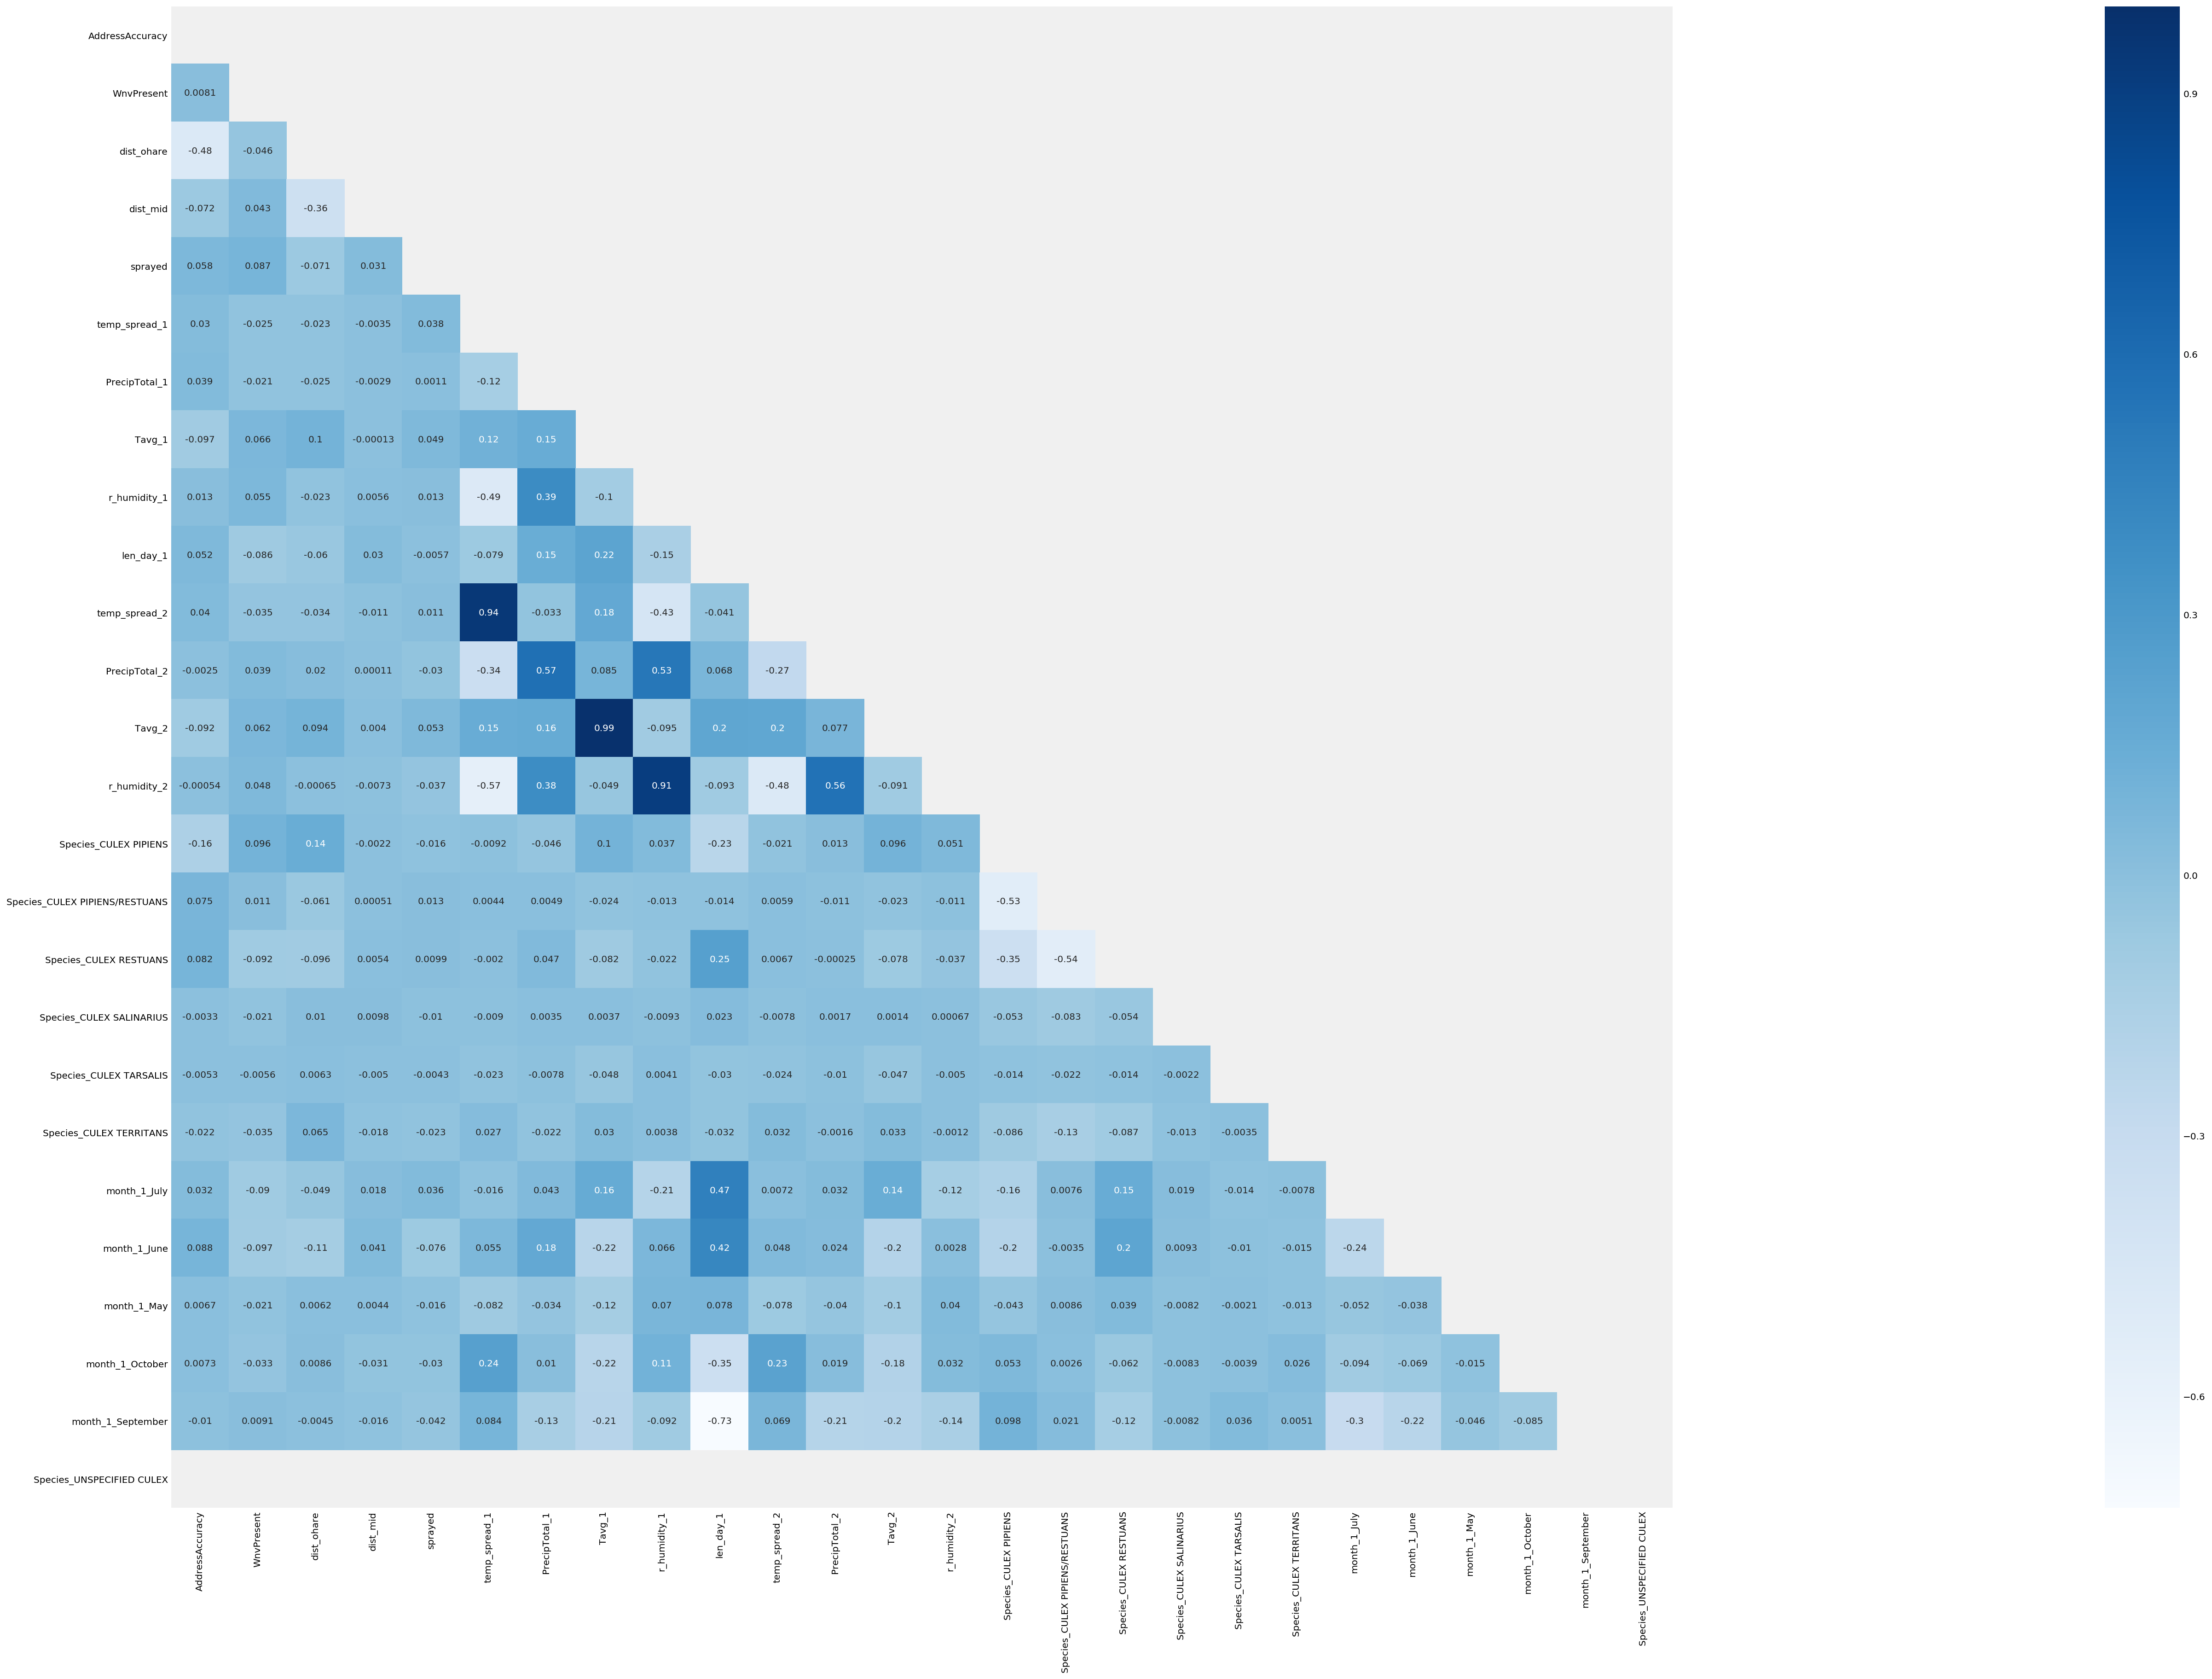

In [93]:
plt.figure(figsize=(150,30))
mask = np.zeros_like(trained.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(trained.corr(), mask=mask, annot=True, square=True, cmap='Blues')

In [94]:
trained.to_csv('train_bsmote.csv',index=False) #bsmote = before SMOTE

In [95]:
#station_1 = weather_df1[weather_df1.Station == 1].reset_index()
#station_2 = weather_df1[weather_df1.Station == 2].reset_index()
#station = pd.merge(station_1, station_2, on =['Date', 'month', 'len_day1', 'weekday_name', 'Depart',
#                                              ]) #'temp_spread','Tavg','PrecipTotal','r_humidity'
#station['Date'] = station['Date'].map(lambda x:datetime.strptime(x, '%Y-%m-%d'))

### Our Attempt at PCA

In [96]:
trained = pd.read_csv('train_bsmote.csv')

In [98]:
trained.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 26 columns):
AddressAccuracy                   10506 non-null int64
WnvPresent                        10506 non-null int64
dist_ohare                        10506 non-null float64
dist_mid                          10506 non-null float64
sprayed                           10506 non-null int64
temp_spread_1                     10506 non-null int64
PrecipTotal_1                     10506 non-null float64
Tavg_1                            10506 non-null float64
r_humidity_1                      10506 non-null float64
len_day_1                         10506 non-null float64
temp_spread_2                     10506 non-null int64
PrecipTotal_2                     10506 non-null float64
Tavg_2                            10506 non-null float64
r_humidity_2                      10506 non-null float64
Species_CULEX PIPIENS             10506 non-null int64
Species_CULEX PIPIENS/RESTUANS    10506 non-null

In [99]:
X = trained.drop(labels='WnvPresent', axis=1)
y = trained.WnvPresent

In [100]:
pca = PCA()
ss = StandardScaler()
Xs = ss.fit_transform(X)
Xt = pca.fit_transform(Xs)

print(pca.explained_variance_)
print(pca.components_)

[3.49406397e+00 2.71523890e+00 2.28281465e+00 1.69097790e+00
 1.61726853e+00 1.42335205e+00 1.17083245e+00 1.11194841e+00
 1.03747980e+00 1.02026109e+00 1.00208937e+00 9.77808608e-01
 9.69521462e-01 9.60308871e-01 7.81683312e-01 5.04781580e-01
 4.05336552e-01 3.54687687e-01 2.82211361e-01 8.49828623e-02
 7.12929129e-02 3.97546081e-02 3.44429253e-03 1.43407709e-04
 0.00000000e+00]
[[ 3.30007634e-03 -4.24209988e-03  3.75214035e-03 -2.09229385e-02
  -4.26198785e-01  2.50085665e-01 -8.32239488e-02  4.55080314e-01
   2.19043930e-02 -3.94702012e-01  3.63713815e-01 -9.52783094e-02
   4.73495221e-01  3.81092027e-03 -8.94070237e-03  1.06564883e-02
   2.07811204e-03  6.99053446e-03 -1.51626539e-02 -4.96555533e-02
   5.12711447e-02  4.85578097e-02 -3.36463117e-02 -1.01972310e-01
  -0.00000000e+00]
 [-7.53268440e-03  1.34803857e-02 -2.54391177e-02 -4.08530528e-02
  -1.31625987e-02 -1.94195800e-01 -4.16424646e-01  6.70946999e-02
  -4.88528991e-01 -5.14403646e-02 -1.35214863e-01 -4.08301934e-01
   2

In [101]:
Xt

array([[-1.63872089e+00, -3.15293349e-01,  1.87195414e+00, ...,
        -4.91395389e-02, -6.54397080e-04, -0.00000000e+00],
       [-1.59648717e+00, -7.10450903e-01,  2.41070751e+00, ...,
        -5.01658059e-02, -6.94669573e-04,  0.00000000e+00],
       [-1.59465664e+00, -7.24910594e-01,  2.43037065e+00, ...,
        -5.08446500e-02, -7.39117623e-04, -0.00000000e+00],
       ...,
       [-7.90639954e-01,  3.05244772e+00,  4.14976118e-01, ...,
        -2.55425865e-02, -5.98588430e-04, -0.00000000e+00],
       [-7.80659064e-01,  3.00042388e+00,  8.72473821e-01, ...,
        -2.41395754e-02, -8.73046542e-04,  0.00000000e+00],
       [-7.99737088e-01,  3.09048818e+00, -1.23327186e-01, ...,
        -2.76827959e-02, -4.01282841e-04, -0.00000000e+00]])

In [102]:
print(Xt.shape)
print(y.shape)

(10506, 25)
(10506,)


In [103]:
#trained_pc2['index'] = range(1, len(trained_pc2) + 1)
#trained_WnV['index'] = range(1, len(trained_WnV) + 1)

In [104]:
#trained_pc3 = trained_pc2.merge(trained_WnV, on='index')
#trained_pc3.drop(labels='index',axis=1,inplace=True)

In [105]:
var_exp = pca.explained_variance_ratio_
print('Explained variance:            ', var_exp)

cum_var_exp = np.cumsum(var_exp)
print('Cumulative explained variance: ', cum_var_exp)

Explained variance:             [1.45572141e-01 1.13124185e-01 9.51082234e-02 7.04507059e-02
 6.73797747e-02 5.93006905e-02 4.87800421e-02 4.63267737e-02
 4.32242102e-02 4.25068325e-02 4.17497494e-02 4.07381473e-02
 4.03928825e-02 4.00090611e-02 3.25670378e-02 2.10305639e-02
 1.68874155e-02 1.47772469e-02 1.17576874e-02 3.54061555e-03
 2.97025529e-03 1.65628434e-03 1.43498529e-04 5.97475244e-06
 0.00000000e+00]
Cumulative explained variance:  [0.14557214 0.25869633 0.35380455 0.42425526 0.49163503 0.55093572
 0.59971576 0.64604254 0.68926675 0.73177358 0.77352333 0.81426148
 0.85465436 0.89466342 0.92723046 0.94826102 0.96514844 0.97992568
 0.99168337 0.99522399 0.99819424 0.99985053 0.99999403 1.
 1.        ]


C:\Users\Alfred\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
C:\Users\Alfred\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.


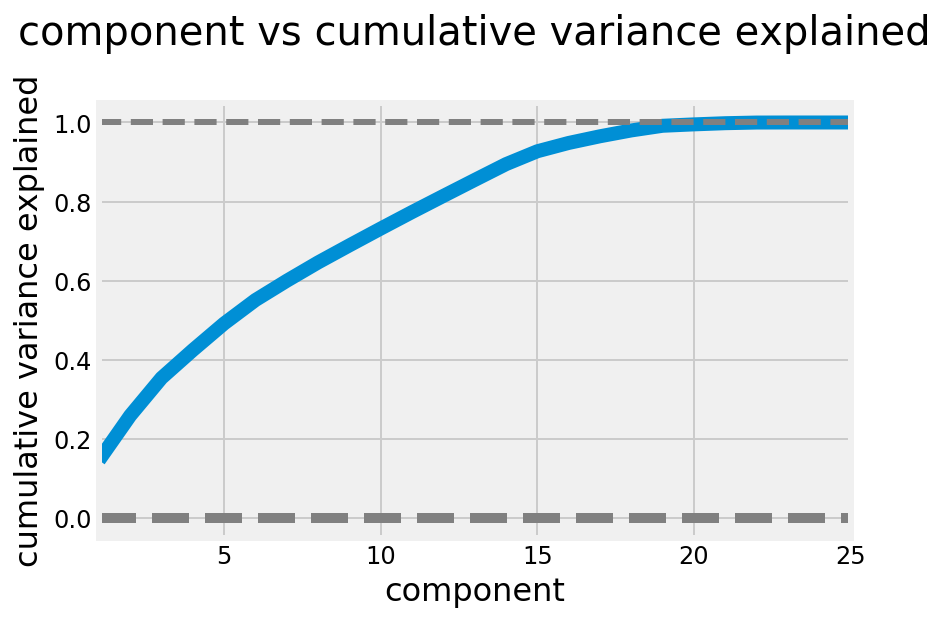

In [106]:
component_number = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
plt.plot(component_number, cum_var_exp, lw=7)

plt.axhline(y=0, linewidth=5, color='grey', ls='dashed')
plt.axhline(y=1, linewidth=3, color='grey', ls='dashed')

# Set the x and y axis limits
ax = plt.gca()
ax.set_xlim([1,25])
ax.set_ylim([-0.05,1.05])

# Label the axes
ax.set_ylabel('cumulative variance explained', fontsize=16)
ax.set_xlabel('component', fontsize=16)

# Make the tick labels bigger
for Tick in ax.xaxis.get_major_ticks():
    Tick.label.set_fontsize(12) 
for Tick in ax.yaxis.get_major_ticks():
    Tick.label.set_fontsize(12) 
    
# Add title
ax.set_title('component vs cumulative variance explained\n', fontsize=20)

plt.show()

In [107]:
features_pca = ['PC'+str(i+1) for i in range(pca.n_components_)]
Z = pd.DataFrame(Xt, columns=features_pca)
Z.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
0,-1.638721,-0.315293,1.871954,0.231968,-1.472338,-0.413699,0.457401,-2.836412,-2.407519,-5.090394,-1.974049,6.292060,3.882952,-4.687962,2.325031,0.494883,0.422678,0.526950,-0.562574,-0.114618,0.401386,0.324766,-0.049140,-0.000654,-0.0
1,-1.596487,-0.710451,2.410708,-1.172798,0.556457,0.518915,0.919645,-1.981963,-2.417794,-5.193400,-1.854391,6.067995,4.586684,-4.844037,1.838958,0.617032,0.532604,0.500650,-0.450710,-0.134788,0.433449,0.327302,-0.050166,-0.000695,0.0
2,-1.594657,-0.724911,2.430371,-1.146998,0.539643,0.710176,0.757106,-2.286871,-2.230890,-5.242391,-1.681555,5.967495,4.798952,-4.824060,1.844562,0.651448,0.629079,0.132911,-0.476830,-0.142833,0.423410,0.326270,-0.050845,-0.000739,-0.0
3,-1.638643,-0.323014,1.781180,0.139870,-1.471226,-0.362354,0.232401,-3.240781,-2.186754,-5.121663,-1.686283,6.102367,4.269404,-4.605466,2.331091,0.451902,0.334034,0.850376,-0.514818,-0.118860,0.398028,0.326158,-0.049597,-0.000712,-0.0
4,-1.596409,-0.718171,2.319934,-1.264896,0.557569,0.570261,0.694646,-2.386332,-2.197029,-5.224669,-1.566625,5.878302,4.973137,-4.761542,1.845018,0.574051,0.443960,0.824076,-0.402953,-0.139031,0.430091,0.328693,-0.050623,-0.000752,-0.0


In [108]:
Z.corr()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
PC1,1.000000e+00,1.240581e-16,1.813933e-16,7.759267e-17,-1.997445e-16,-7.559281e-17,-1.831354e-16,8.991652e-17,-1.083302e-16,2.487299e-16,5.507481e-17,1.550728e-16,2.247052e-16,1.857231e-16,2.855800e-16,-6.303033e-16,1.211847e-15,-8.145411e-17,-1.010387e-15,2.508026e-16,-4.614744e-16,-1.341766e-16,-6.878581e-16,-8.688824e-17,NaN
PC2,1.240581e-16,1.000000e+00,3.106152e-16,-3.997454e-16,-5.085714e-17,-4.157318e-16,2.750601e-17,1.425934e-16,-3.846089e-17,2.853373e-16,-8.094485e-17,5.712951e-17,-9.639055e-17,2.733161e-17,4.888954e-16,2.575672e-16,4.528669e-16,1.358869e-16,7.571203e-16,-1.986700e-17,2.982179e-16,2.905684e-16,-1.782437e-16,1.365309e-17,NaN
PC3,1.813933e-16,3.106152e-16,1.000000e+00,7.109373e-16,-3.576946e-16,5.441383e-16,2.272359e-16,7.548019e-16,1.709605e-16,-1.343300e-16,-3.654655e-16,1.843539e-16,-4.481849e-16,-2.187335e-18,-2.600093e-17,-1.750228e-16,1.833607e-16,4.206924e-16,-1.974921e-16,6.056765e-16,5.465892e-17,-1.504648e-16,1.612293e-16,-3.911387e-18,NaN
PC4,7.759267e-17,-3.997454e-16,7.109373e-16,1.000000e+00,9.704086e-16,-4.099461e-16,-7.578131e-17,3.614729e-16,-1.453877e-16,-1.135155e-16,-3.653182e-16,3.277157e-16,-3.775645e-16,2.657042e-17,-1.890697e-16,4.849968e-16,-2.160877e-17,1.349437e-16,7.975849e-17,-4.733183e-17,2.328539e-17,1.426249e-16,-2.880525e-16,3.261230e-17,NaN
PC5,-1.997445e-16,-5.085714e-17,-3.576946e-16,9.704086e-16,1.000000e+00,-4.686546e-17,-7.744579e-18,-4.744356e-17,-9.601023e-17,1.093351e-16,1.127741e-17,-8.214261e-17,5.666641e-17,3.957210e-16,1.767118e-18,5.742016e-17,2.168111e-16,1.879784e-16,-7.356291e-17,9.614117e-18,-5.265457e-17,-1.607187e-16,4.218448e-16,-8.344848e-18,NaN
PC6,-7.559281e-17,-4.157318e-16,5.441383e-16,-4.099461e-16,-4.686546e-17,1.000000e+00,-3.372862e-16,8.020992e-17,-3.405735e-17,9.252409e-18,-4.611492e-16,-2.552252e-17,-5.082684e-16,-6.978433e-16,1.712720e-16,6.535868e-17,-5.678627e-17,-3.238384e-16,4.833408e-16,1.801436e-16,-2.015492e-17,8.910189e-17,-1.374415e-16,1.345777e-17,NaN
PC7,-1.831354e-16,2.750601e-17,2.272359e-16,-7.578131e-17,-7.744579e-18,-3.372862e-16,1.000000e+00,-1.778199e-16,-4.951819e-16,1.239659e-16,-3.643955e-16,2.047183e-16,-6.761917e-16,1.128988e-15,1.762255e-15,3.107543e-16,-1.617881e-16,3.150285e-17,-4.284212e-16,-2.237881e-16,-3.398281e-17,2.982183e-17,-4.748950e-16,2.569294e-17,NaN
PC8,8.991652e-17,1.425934e-16,7.548019e-16,3.614729e-16,-4.744356e-17,8.020992e-17,-1.778199e-16,1.000000e+00,-2.109534e-16,5.934580e-17,6.357963e-16,-2.491456e-16,2.835995e-16,-1.549762e-16,-4.397200e-17,-1.962782e-16,-3.875244e-16,-5.910552e-16,-2.642731e-16,9.280888e-17,7.565393e-17,1.817509e-16,4.081179e-16,2.066236e-17,NaN
PC9,-1.083302e-16,-3.846089e-17,1.709605e-16,-1.453877e-16,-9.601023e-17,-3.405735e-17,-4.951819e-16,-2.109534e-16,1.000000e+00,-6.479782e-17,5.976813e-16,-2.956860e-16,-3.569170e-16,-8.692228e-16,-3.283839e-16,-2.219191e-16,2.498483e-17,2.556861e-16,-7.665255e-17,-1.092846e-16,-1.185420e-16,7.539179e-17,6.884301e-17,7.604929e-17,NaN
PC10,2.487299e-16,2.853373e-16,-1.343300e-16,-1.135155e-16,1.093351e-16,9.252409e-18,1.239659e-16,5.934580e-17,-6.479782e-17,1.000000e+00,8.848649e-16,-1.605194e-15,-6.868499e-16,1.098816e-16,-2.049215e-16,-1.157154e-17,1.598470e-16,-8.496251e-17,-1.517655e-16,-4.055751e-17,-1.899512e-16,5.593994e-17,2.979642e-16,2.023709e-17,NaN


In [109]:
np.cov(Z.values.T)

array([[ 3.49406397e+00, -3.40898181e-16,  9.95639131e-16,
         5.19463894e-16, -4.76175237e-16, -1.73154631e-16,
         5.41108223e-18,  4.45061514e-16, -8.11662335e-17,
         2.27265454e-16,  1.51510303e-16, -3.35487098e-16,
         4.76175237e-16,  4.01772856e-16, -8.92828568e-17,
         4.81586319e-16,  4.97819565e-16, -9.19883980e-17,
         1.62332467e-16, -1.35277056e-17, -4.32886579e-17,
        -3.85539609e-17, -2.02915584e-17,  2.11370400e-20,
         0.00000000e+00],
       [-3.40898181e-16,  2.71523890e+00,  5.84396881e-16,
        -1.14714943e-15,  1.69096320e-16, -8.68478698e-16,
        -2.43498700e-16,  3.78775756e-16,  4.86997401e-17,
         8.11662335e-18, -1.02810562e-16,  1.70787283e-17,
        -4.81586319e-16, -5.51930388e-16,  1.78565714e-16,
         1.51510303e-16,  8.11662335e-17,  8.08280409e-17,
        -8.11662335e-17, -7.03440690e-17,  0.00000000e+00,
        -1.35277056e-17, -2.02915584e-18, -1.58527800e-20,
         0.00000000e+00],
    

C:\Users\Alfred\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  if sys.path[0] == '':
C:\Users\Alfred\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  from ipykernel import kernelapp as app


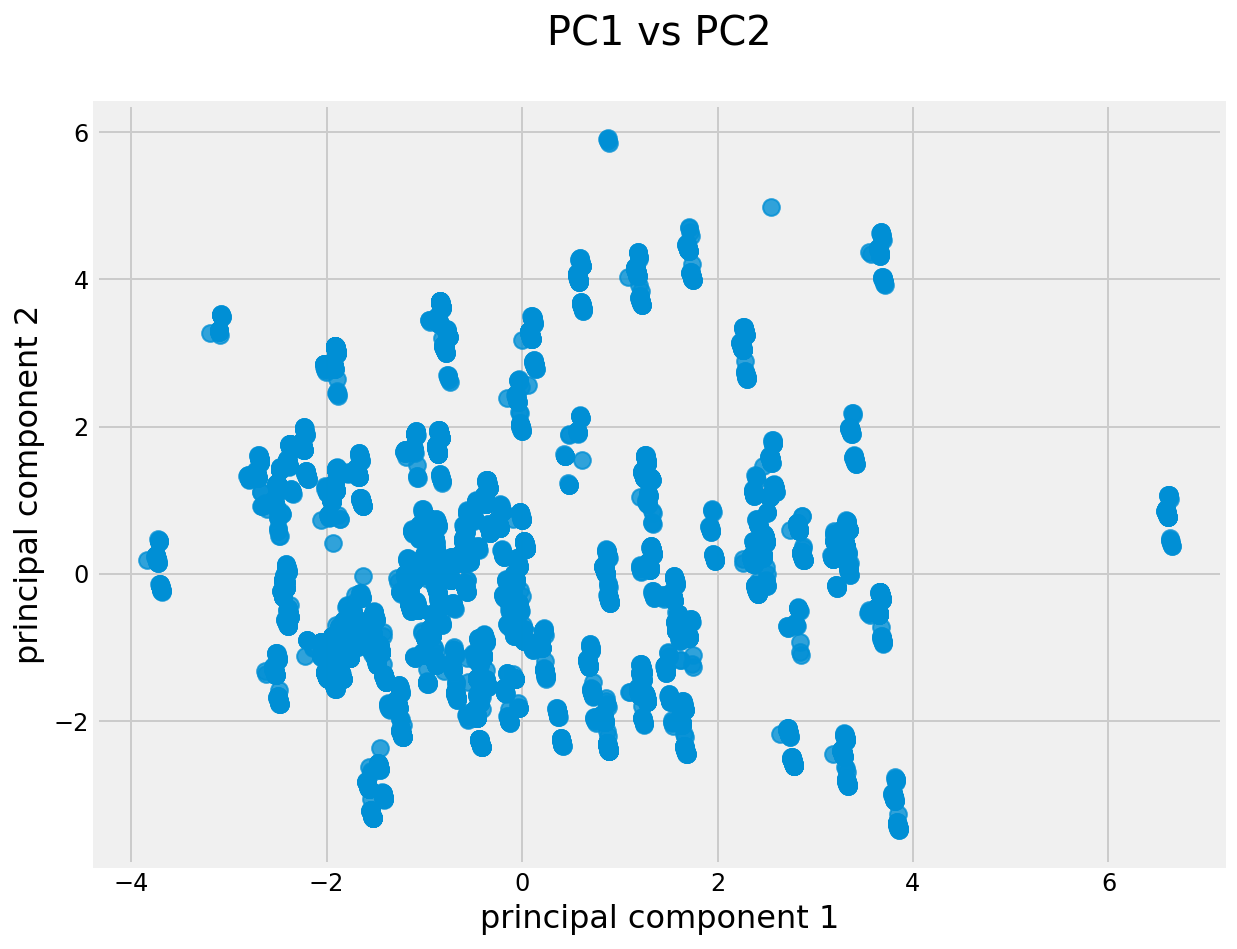

In [110]:
fig = plt.figure(figsize=(9,7))

ax = fig.gca()
ax = sns.regplot(Z.iloc[:,0], Z.iloc[:,1],
                 fit_reg=False, scatter_kws={'s':70}, ax=ax)

ax.set_xlabel('principal component 1', fontsize=16)
ax.set_ylabel('principal component 2', fontsize=16)


for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
ax.set_title('PC1 vs PC2\n', fontsize=20)

plt.show()


C:\Users\Alfred\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Alfred\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Alfred\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  


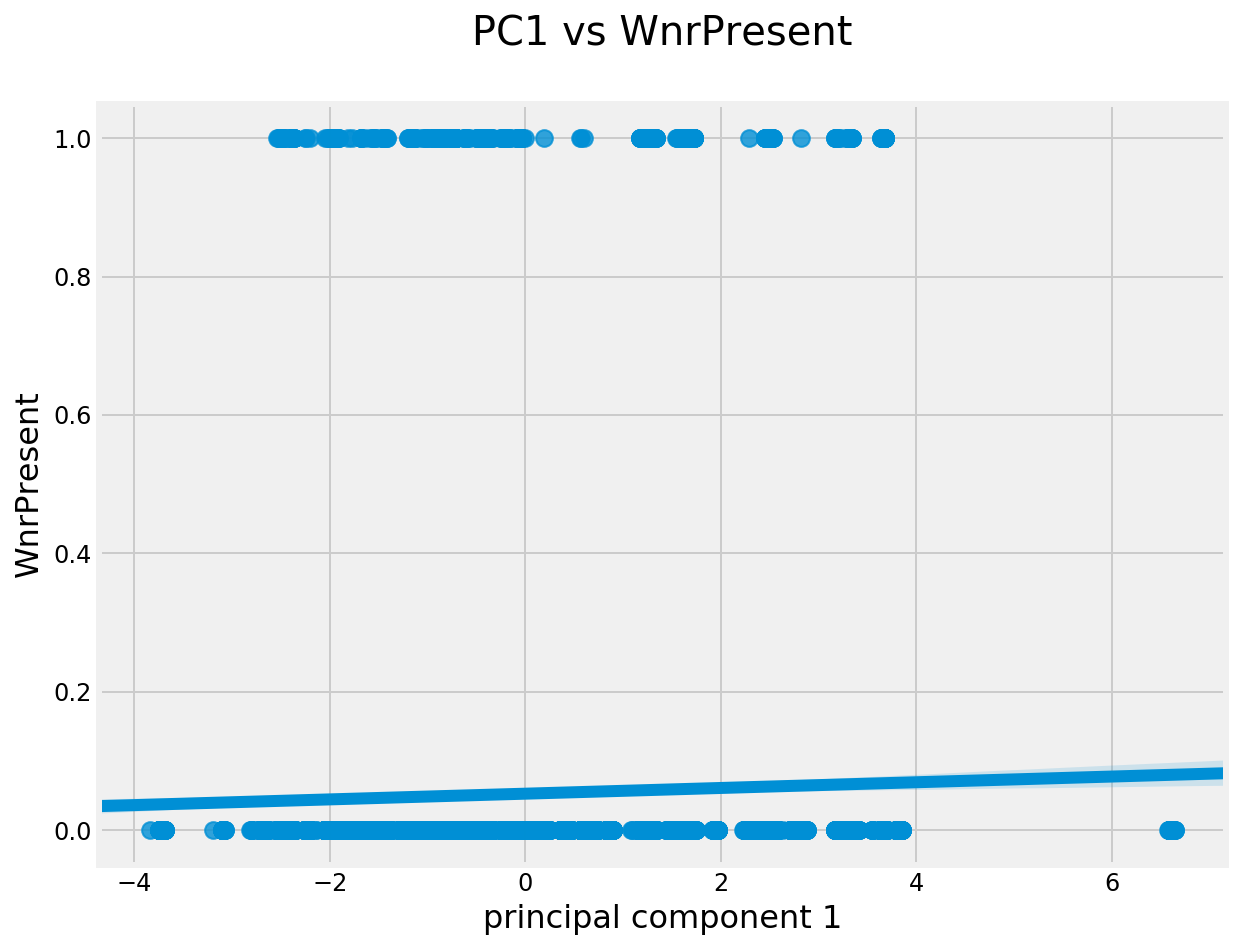

In [111]:
fig = plt.figure(figsize=(9,7))
ax = fig.gca()
ax = sns.regplot(Z.iloc[:,0], y,
                 fit_reg=True, scatter_kws={'s':70}, ax=ax)

ax.set_xlabel('principal component 1', fontsize=16)
ax.set_ylabel('WnrPresent', fontsize=16)


for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
ax.set_title('PC1 vs WnrPresent\n', fontsize=20)

plt.show()

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [113]:
scaling = ('scaling', StandardScaler())
pca = ('pca', PCA())
smt = ('smt', SMOTE(random_state=42,n_jobs=-1))
lr = ('lr', LogisticRegression(solver='sag',verbose=0,n_jobs=-1))
pipe = Pipeline([scaling, smt, pca, lr])

pipe_params = {
    'pca__n_components': [15, 16, 17, 18, 19, 20],
    'lr__max_iter': [1000, 2000, 3000]
}
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=5,n_jobs=-1)
gs.fit(X_train, y_train)
y_hat = gs.predict(X_test)
print(classification_report(y_test, y_hat))
print(gs.best_params_)
print(gs.best_score_)

              precision    recall  f1-score   support

           0       0.98      0.66      0.79      2489
           1       0.11      0.74      0.19       138

    accuracy                           0.66      2627
   macro avg       0.54      0.70      0.49      2627
weighted avg       0.93      0.66      0.75      2627

{'lr__max_iter': 1000, 'pca__n_components': 17}
0.6695012057367686


In [114]:
scaling = ('scaling', StandardScaler())
pca = ('pca', PCA())
smt = ('smt', SMOTE(random_state=42))
DecisionTree = ('DecisionTree', DecisionTreeClassifier (random_state = 42))
pipe = Pipeline([scaling, smt, pca, DecisionTree])

pipe_params = {
    'pca__n_components': [15, 16, 17, 18, 19, 20],
    'DecisionTree__max_depth' : [None, 6, 10, 14], 
    'DecisionTree__min_samples_leaf' : [1, 2],
    'DecisionTree__min_samples_split': [2, 3] 
}
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=5)
gs.fit(X_train, y_train)
y_hat = gs.predict(X_test)
print(classification_report(y_test, y_hat))
print(gs.best_params_)
print(gs.best_score_)


              precision    recall  f1-score   support

           0       0.96      0.91      0.93      2489
           1       0.16      0.30      0.21       138

    accuracy                           0.88      2627
   macro avg       0.56      0.61      0.57      2627
weighted avg       0.92      0.88      0.90      2627

{'DecisionTree__max_depth': None, 'DecisionTree__min_samples_leaf': 2, 'DecisionTree__min_samples_split': 2, 'pca__n_components': 17}
0.8823454753141261


In [117]:
classifier_models = {
    'DecisionTree' : DecisionTreeClassifier (random_state = 42), 
    'AdaBoost' : AdaBoostClassifier (random_state = 42), 
    'GradientBoosting' : GradientBoostingClassifier (random_state = 42),
    'SVM' : SVC (random_state = 42),
    'XGBoost' : XGBClassifier (random_state = 42)
}

In [118]:
classifier_model_params = {
        'DecisionTree': {
        'max_depth' : [None, 6, 10, 14], 
        'min_samples_leaf' : [1, 2],
        'min_samples_split': [2, 3] },
    
        'AdaBoost' : {
        'n_estimators' : np.arange(100, 151, 25),
        'learning_rate' : np.linspace(0.05, 1, 20) },
    
        'GradientBoosting' : {
        'n_estimators' : np.arange(5, 150, 10),
        'learning_rate' : np.linspace(0.05, 1, 20),
        'max_depth' : [1, 2, 3] },
    
# https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769
        'SVM' : {
        'C' : np.logspace(-3, 2, 6),
        'kernel' : ['rbf', 'linear','poly'],
        'gamma': [1e-2, 1e-3, 1e-4, 1e-5], 
        },
    
        'XGBoost' : {
        'n_estimators'  : np.arange(100, 151, 25), 
        'learning_rate' : np.arange(0.1, 1, .3),
        'max_depth' : [3],
        'alpha' : np.arange(0, 1, .3),
        'lambda' : np.arange(0, 1, .3),
        'gamma' : np.arange(0, 1, .3),
        'subsample' : [.5],
        'n_jobs' : [2] }
}

In [120]:
X = trained.drop(labels='WnvPresent',axis=1)
y = trained['WnvPresent']

ss = StandardScaler()
Xs = ss.fit_transform(X)

pca = PCA(n_components=17)
Xt = pca.fit_transform(Xs)

lr = LogisticRegression()

print(cross_val_score(lr, Xt, y, cv=5).mean())

pc = pd.DataFrame(pca.components_.T, columns=['PC1','PC2','PC3','PC4','PC5','PC6',
                                                             'PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15',
                                                             'PC16','PC17'])


C:\Users\Alfred\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Alfred\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Alfred\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Alfred\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Alfred\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

0.9234700434888736


In [121]:
tested['Species_UNSPECIFIED CULEX'] = '0'

In [122]:
tested.to_csv('./kaggle_test.csv')

## LogisticRegression

In [124]:
scaling = ('scaling', StandardScaler())
pca = ('pca', PCA())
smt = ('smt', SMOTE(random_state=42,n_jobs=-1))
lr = ('lr', LogisticRegression(solver='sag',verbose=0,n_jobs=-1))
pipe = Pipeline([scaling, smt, pca, lr])

pipe_params = {
    'pca__n_components': [17,18, 20, 23],
    'lr__max_iter': [500, 1000, 5000]
}
gs_ls = GridSearchCV(pipe, param_grid=pipe_params, cv=5,n_jobs=-1)
gs_ls.fit(X_train, y_train)
y_hat = gs_ls.predict(X_test)
print(classification_report(y_test, y_hat))
print(gs_ls.best_params_)
print(gs_ls.best_score_)

              precision    recall  f1-score   support

           0       0.98      0.66      0.79      2489
           1       0.11      0.74      0.19       138

    accuracy                           0.66      2627
   macro avg       0.54      0.70      0.49      2627
weighted avg       0.93      0.66      0.75      2627

{'lr__max_iter': 500, 'pca__n_components': 17}
0.669628125396624


C:\Users\Alfred\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [125]:
scaling = ('scaling', StandardScaler())
pca = ('pca', PCA())
smt = ('smt', SMOTE(random_state=42,n_jobs=-1))
lr = ('lr', LogisticRegression(solver='sag',verbose=0,n_jobs=-1))
pipe = Pipeline([scaling, smt, pca, lr])

pipe_params = {
    'pca__n_components': [17],
    'lr__max_iter': [500]
}
gs_lr = GridSearchCV(pipe, param_grid=pipe_params, cv=5,n_jobs=-1)
gs_lr.fit(X_train, y_train)
y_hat = gs_lr.predict(X_test)
print(classification_report(y_test, y_hat))
print(gs_lr.best_params_)
print(gs_lr.best_score_)

              precision    recall  f1-score   support

           0       0.98      0.66      0.79      2489
           1       0.11      0.74      0.19       138

    accuracy                           0.66      2627
   macro avg       0.54      0.70      0.49      2627
weighted avg       0.93      0.66      0.75      2627

{'lr__max_iter': 500, 'pca__n_components': 17}
0.669628125396624


C:\Users\Alfred\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [126]:
submission = pd.DataFrame(gs_lr.predict(tested), columns = ['WnvPresent'])
submission.set_index(np.arange(1, tested.shape[0] + 1), inplace=True)
submission = submission.reset_index().rename(columns = {'index':'Id'})
submission.to_csv('./submission_gs_lr.csv', index = False) #0.61

## BernoulliNB

In [127]:
scaling = ('scaling', StandardScaler())
pca = ('pca', PCA())
smt = ('smt', SMOTE(random_state=42,n_jobs=-1))
bnl = ('bnl', BernoulliNB())
pipe = Pipeline([scaling, smt, pca, bnl])

pipe_params = {
    'pca__n_components': [17, 18, 22, 23],
    'bnl__alpha': [0.1, 0.2, 0.4, 0.5, 1]
}
gs_bnl = GridSearchCV(pipe, param_grid=pipe_params, cv=5,n_jobs=-1)
gs_bnl.fit(X_train, y_train)
y_hat = gs_bnl.predict(X_test)
print(classification_report(y_test, y_hat))
print(gs_bnl.best_params_)
print(gs_bnl.best_score_)

              precision    recall  f1-score   support

           0       0.97      0.69      0.81      2489
           1       0.10      0.64      0.18       138

    accuracy                           0.69      2627
   macro avg       0.54      0.66      0.49      2627
weighted avg       0.93      0.69      0.78      2627

{'bnl__alpha': 0.1, 'pca__n_components': 23}
0.6728011168930067


In [128]:
scaling = ('scaling', StandardScaler())
pca = ('pca', PCA())
smt = ('smt', SMOTE(random_state=42,n_jobs=-1))
bnl = ('bnl', BernoulliNB())
pipe = Pipeline([scaling, smt, pca, bnl])

pipe_params = {
    'pca__n_components': [23],
    'bnl__alpha': [0.1]
}
gs_bnl = GridSearchCV(pipe, param_grid=pipe_params, cv=5,n_jobs=-1)
gs_bnl.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaling',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('smt',
                                        SMOTE(k_neighbors=5, kind='deprecated',
                                              m_neighbors='deprecated',
                                              n_jobs=-1, out_step='deprecated',
                                              random_state=42, ratio=None,
                                              sampling_strategy='auto',
                                              svm_estimator='deprecated')),
                                       ('pca',
                                        PCA(c...erated_power='auto',
                         

In [129]:
submission = pd.DataFrame(gs_bnl.predict(tested), columns = ['WnvPresent'])
submission.set_index(np.arange(1, tested.shape[0] + 1), inplace=True)
submission = submission.reset_index().rename(columns = {'index':'Id'})
submission.to_csv('./submission_gs_bnl.csv', index = False) 

## XGBoost

In [130]:
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

In [132]:
scaling = ('scaling', StandardScaler())
pca = ('pca', PCA())
smt = ('smt', SMOTE(random_state=42, n_jobs= -1))
XGBoost = ('XGBoost', XGBClassifier (random_state = 42,subsample=0.4, n_jobs = -1))
pipe = Pipeline([scaling, smt, pca, XGBoost])

pipe_params = {
    'pca__n_components': [17, 18, 20 ,23],
    'XGBoost__n_estimators'  : [125, 500], 
    'XGBoost__learning_rate' : np.arange(0.1, 1, .3),
    'XGBoost__min_child_weight': [1, 2 ],
    'XGBoost__max_depth' : [3, 4],
    'XGBoost__max_depth' : [3, 4],
#         'XGBoost__alpha' : np.arange(0, 1, .3),
#         'XGBoost__lambda' : np.arange(0, 1, .3),
    'XGBoost__gamma' : np.arange(0, 0.5, 0.9)           
}
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)
y_hat = gs.predict(X_test)
print(classification_report(y_test, y_hat))
print(gs.best_params_)
print(gs.best_score_)


              precision    recall  f1-score   support

           0       0.96      0.92      0.94      2489
           1       0.16      0.28      0.20       138

    accuracy                           0.89      2627
   macro avg       0.56      0.60      0.57      2627
weighted avg       0.92      0.89      0.90      2627

{'XGBoost__gamma': 0.0, 'XGBoost__learning_rate': 0.4, 'XGBoost__max_depth': 4, 'XGBoost__min_child_weight': 2, 'XGBoost__n_estimators': 500, 'pca__n_components': 23}
0.8858992257900749


In [134]:
submission = pd.DataFrame(gs.predict(tested), columns = ['WnvPresent'])

In [135]:
submission.set_index(np.arange(1, tested.shape[0] + 1), inplace=True)
submission = submission.reset_index().rename(columns = {'index':'Id'})
submission.to_csv('./submission_gs_xgb.csv', index = False)